In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   

In [ ]:
!pip install wbgapi

In [ ]:
import wbgapi as wb

In [ ]:
# atm
atm_nocash=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atm_nocash=atm_nocash.dropna(how='all',axis=True)
atm_nocash=atm_nocash.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
atm_nocash
#bank
bank_nocash=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
bank_nocash=bank_nocash.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
bank_nocash=bank_nocash.dropna(how='all',axis=True)
bank_nocash

NameError: ignored

In [ ]:
#account
ant_nocash=wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
ant_nocash=ant_nocash.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
ant_nocash=ant_nocash.dropna(how='all',axis=True)
print(ant_nocash)
#gdp
gdp_nocash=wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('WLD'))
gdp_nocash=gdp_nocash.loc[['NGA','THA','JPN','SAU','VNM','PHL']]
gdp_nocash=gdp_nocash.dropna(how='all',axis=True)
gdp_nocash

            YR2011     YR2014     YR2017
economy                                 
NGA      29.667538  44.441986  39.666859
THA      72.666435  78.136551  81.594002
JPN      96.422043  96.645584  98.243393
SAU      46.420662  69.409584  71.698120
VNM      21.369493  30.950945  30.795792
PHL      26.555925  31.285835  34.498409


,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,YR1970,YR1971,YR1972,YR1973,YR1974,YR1975,YR1976,YR1977,YR1978,YR1979,YR1980,YR1981,YR1982,YR1983,YR1984,YR1985,YR1986,YR1987,YR1988,YR1989,YR1990,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
economy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NGA,92.960466,96.979030,104.387029,107.540573,113.168717,117.188635,124.307793,99.406079,97.201743,121.245373,224.104485,160.248736,209.226045,252.232694,402.849912,438.331302,556.702170,536.216179,527.311281,662.263961,874.402071,2180.197621,1843.909353,1222.629304,902.215850,882.520001,639.013123,598.264862,549.237433,474.232041,567.528649,502.914139,477.177624,270.223967,321.320674,408.181045,461.519620,479.983764,469.430549,497.841574,567.930722,590.381815,741.747494,795.386229,1007.874342,1268.383462,1656.424794,1883.461388,2242.871900,1891.335297,2280.437337,2487.598017,2723.822191,2961.549422,3098.985791,2687.480056,2176.002772,1968.565398,2027.778549,2229.858652,2097.092473
THA,100.767475,107.498001,113.782850,118.143907,125.938694,137.918647,161.005522,166.923063,174.784754,186.879168,192.127686,194.266671,209.374781,269.887959,332.175270,351.619336,391.569390,445.420852,528.626755,589.885060,682.929973,721.059345,742.851233,798.080450,818.038934,747.703437,813.451505,936.780458,1123.437643,1295.464722,1508.942470,1716.415420,1927.882603,2209.363030,2491.427836,2846.586834,3043.980314,2468.184730,1845.828870,2033.258009,2007.735271,1893.264239,2096.187802,2359.116831,2660.126835,2894.062656,3369.543198,3973.017172,4379.658787,4213.006654,5076.339872,5492.121500,5860.581471,6168.261356,5951.883487,5840.053067,5993.305516,6593.818352,7296.879608,7817.011522,7189.041835
JPN,475.319076,568.907743,639.640785,724.693762,843.616879,928.518849,1068.558440,1239.318377,1451.337703,1684.659403,2056.122046,2272.077802,2967.041996,3974.745605,4353.824355,4674.445481,5197.622337,6335.286871,8820.691945,9103.564756,9463.353855,10360.178267,9575.607713,10421.212436,10978.919805,11576.692113,17113.262324,20748.990924,25059.007433,24822.775567,25371.464171,28915.008205,31414.984637,35681.963942,39933.515056,44197.619101,39150.039631,35638.231956,32423.755613,36610.168316,39169.359570,34406.182464,32820.793643,35387.037420,38298.980171,37812.895020,35991.546003,35779.024542,39876.303969,41308.996837,44968.156235,48760.078949,49145.280431,40898.647896,38475.395246,34960.639384,39400.739356,38891.086272,39808.168561,40777.608697,39538.879265
SAU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777.267273,801.044739,921.335053,1177.724612,1511.670381,2227.006073,6437.418089,6304.116447,8202.770020,9038.879187,9282.661166,12241.257146,16977.985932,17871.991995,13944.951285,11039.239795,9632.538746,7919.651547,6304.259838,5932.295510,5856.382339,6085.956465,7246.015920,7883.245268,7932.093233,7485.541756,7421.289194,7690.576284,8335.804742,8551.676059,7419.161144,8007.958194,9171.331476,8684.645762,8695.396483,9609.968686,11185.137041,13791.454762,15384.738358,16516.631780,20078.260073,16113.143710,19262.547601,23745.880578,25243.601998,24845.124664,24464.212557,20627.926929,19878.763837,20802.466313,23337.017549,23139.797981,20110.316192
VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.452286,422.780298,575.462683,390.412223,94.564735,95.188260,138.447450,139.200123,182.308402,221.129175,276.812663,324.147224,348.017407,348.324317,362.919503,390.093331,404.807861,430.052872,480.579834,546.909619,687.479727,784.372376,906.284230,1149.424495,1217.268583,1317.890646,1525.119025,1735.152116,1886.690170,2030.278447,2085.101349,2192.174482,2365.521615,2566.447487,2715.275980,2785.724157
PHL,254.458877,267.182838,156.703840,168.040949,175.955798,187.136834,199.956826,207.443957,224.635522,241.710890,186.774696,201.0412

In [ ]:
wld_atm=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
wld_atm=wld_atm.dropna(how='all',axis=True)

wld_gdp=wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('WLD'))
wld_gdp=wld_gdp.dropna(how='all',axis=True)

wld_bank=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
wld_bank=wld_bank.dropna(how='all',axis=True)

wld_ant=wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
wld_ant=wld_ant.dropna(how='all',axis=True)

# 현없사/안현없사 나라 시각화
**안현업사: 'NGA','THA','JPN','SAU','VNM','PHL'**
https://www.statista.com/statistics/1277116/share-of-cash-at-pos-worldwide/ -> 상위 6개국 선택 (Share of cash in offline payment transactions at points-of-sale - such as retail or restaurants in 41 countries worldwide in 2020)

현금 결제 비중 지표 존재 x 

-> 대체 변수 (account, atm, bank) 차례대로 확인 

-> gdp도 확인

-> 이상치, 상관관계, 산점도, 라인플롯으로 확인

[결론] 현없사/ 안현없사의 경제 지표 확인 가능

> 들여쓴 블록

> 들여쓴 블록









<Figure size 1080x576 with 0 Axes>

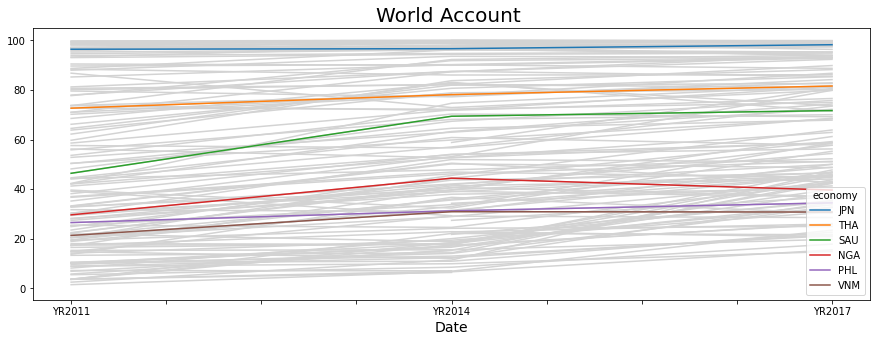

In [ ]:
# Line graph by seaborn
#'NGA','THA','JPN','SAU','VNM','PHL'

# 대체 변수 1. Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)

a5=ant_nocash.sort_values(by='YR2017', ascending=False)[:6]
plt.figure(figsize = (15,8))
ax=wld_ant.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('World Account ', fontsize=20)
plt.xlabel('Date', fontsize=14)

plt.show()

#GDP 성장률이 제일 높은 일본이 계정이 가장 많은 걸 알 수 있다. 

<Figure size 1080x576 with 0 Axes>

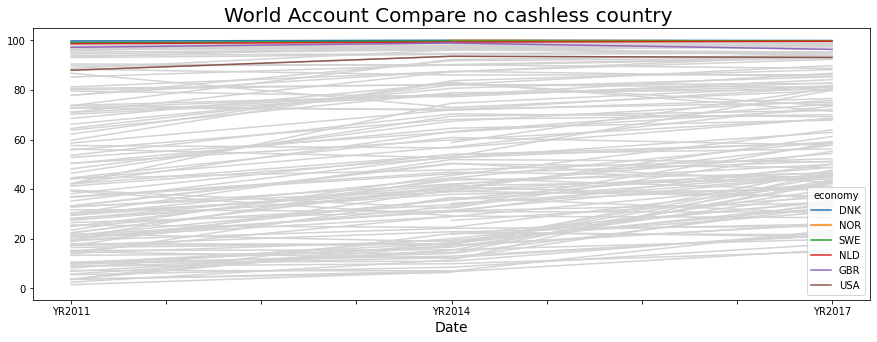

In [ ]:
#현금 결제 비중이 낮고, 빠른 현금없는 사회 도입의 대표 6개국
#'SWE','GBR','NLD','USA','NOR','DNK'
ant=wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
us_ant=ant.loc[['SWE','GBR','NLD','USA','NOR','DNK']]
us_ant=us_ant.dropna(how='all',axis=True)

# Line graph by seaborn
a5=us_ant.sort_values(by='YR2017', ascending=False)[:6]
plt.figure(figsize = (15,8))
ax=wld_ant.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('World Account Compare no cashless country ', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()

#그 전의 그래프보다 계정 비중이 훨씬 높은 걸 알 수 있다. 
# => 계정을 만드는 목적은 다양하고, 경제성장률을 고려하여 대체 변수 찾을 필요가 있음

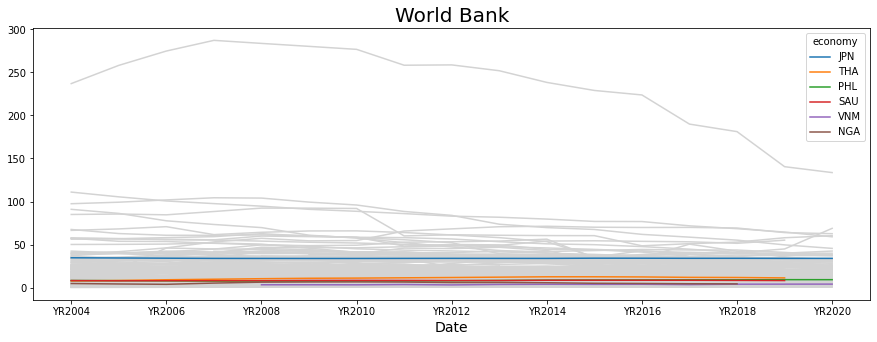

In [ ]:
# sns.reset_defaults()
# %matplotlib inline

# 대체 변수 2. Commercial bank branches (per 100,000 adults)
# 상업 은행을 통해 현금 인프라 유지

a5=bank_nocash.sort_values(by='YR2019', ascending=False)[:6]
ax=wld_bank.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('World Bank', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()

#  미미한 증가폭으로 자세히 확인 필요

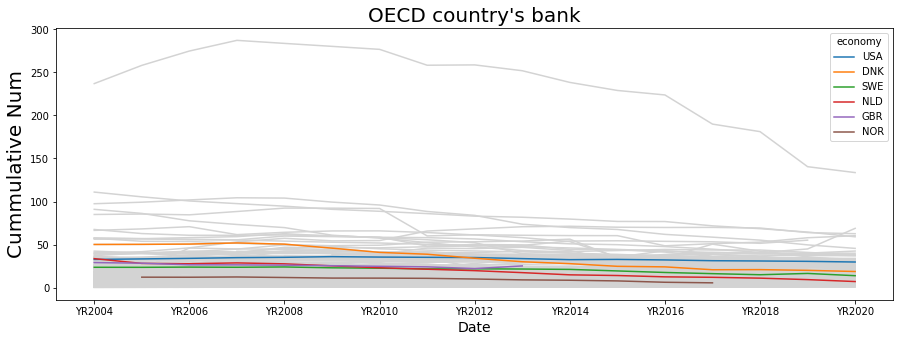

In [ ]:
bankperpop=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
us_bankperpop=bankperpop.loc[['SWE','GBR','NLD','USA','NOR','DNK']]
us_bankperpop=us_bankperpop.dropna(how='all',axis=True)


a5=us_bankperpop.sort_values(by='YR2019', ascending=False)[:6]
ax=wld_bank.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('OECD country\'s bank', fontsize=20)
plt.ylabel('Cummulative Num', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()


# 미미하지만 감소하는 추세를 확인할 수 있다.

<Figure size 1080x576 with 0 Axes>

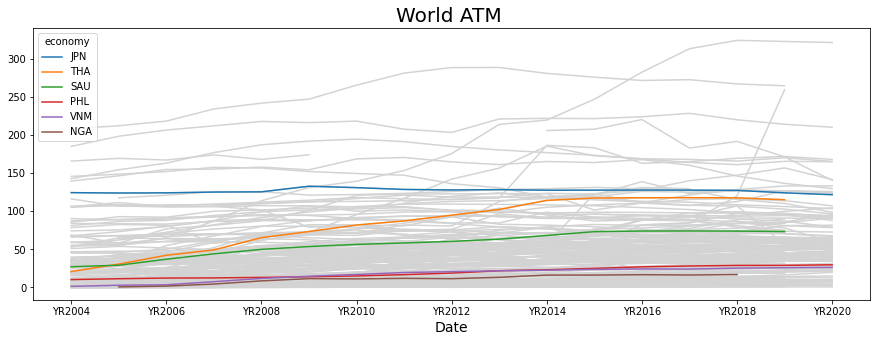

In [ ]:
# Line graph by seaborn
#'NGA','THA','JPN','SAU','VNM','PHL'
# 대체 변수 3. Automated teller machines (ATMs) (per 100,000 adults)
'''
대체 변수 이유:
ATM은 현금 유통이 되기 위해 필요한 수단이다. 
ATM 유지 비용은 현금 사용률과 반비례한다.
즉, 현금 사용률이 낮으면 ATM 유지 비용이 높아지며, ATM의 수는 줄어든다.
'''

a5=atm_nocash.sort_values(by='YR2019', ascending=False)[:6]
plt.figure(figsize = (15,8))
ax=wld_atm.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('World ATM ', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()

# 대체적으로 증가하는 추세를 볼 수 있다. 

<Figure size 1080x576 with 0 Axes>

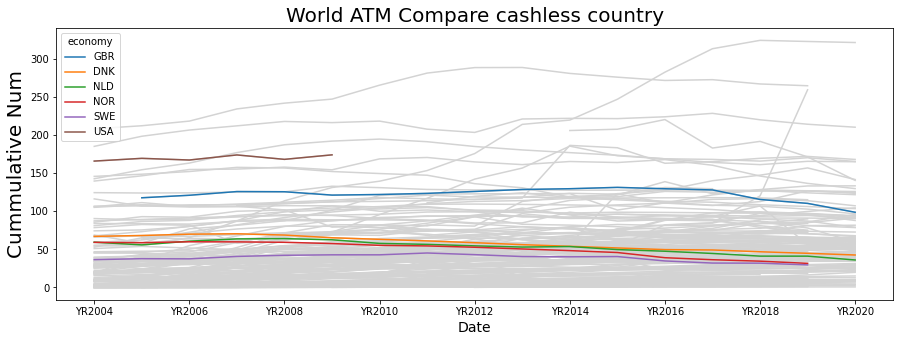

In [ ]:
atmperpop=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atmperpop=atmperpop.dropna(how='all',axis=True)
us_atmperpop=atmperpop.loc[['SWE','GBR','NLD','USA','NOR','DNK']]
us_atmperpop

# Line graph by seaborn

a5=us_atmperpop.sort_values(by='YR2019', ascending=False)[:6]
plt.figure(figsize = (15,8))
ax=wld_atm.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('World ATM Compare cashless country', fontsize=20)
plt.ylabel('Cummulative Num', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()

# 대체적으로 감소하는 추세를 볼 수 있다. 

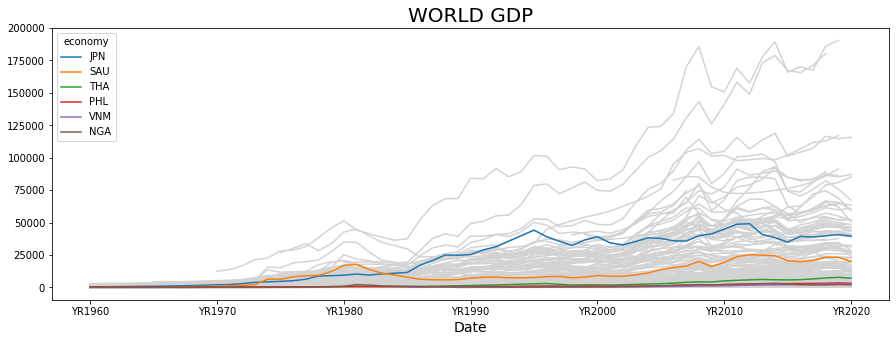

In [ ]:
# GDP 비교

a5=gdp_nocash.sort_values(by='YR2019', ascending=False)[:6]
ax=wld_gdp.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('WORLD GDP', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()



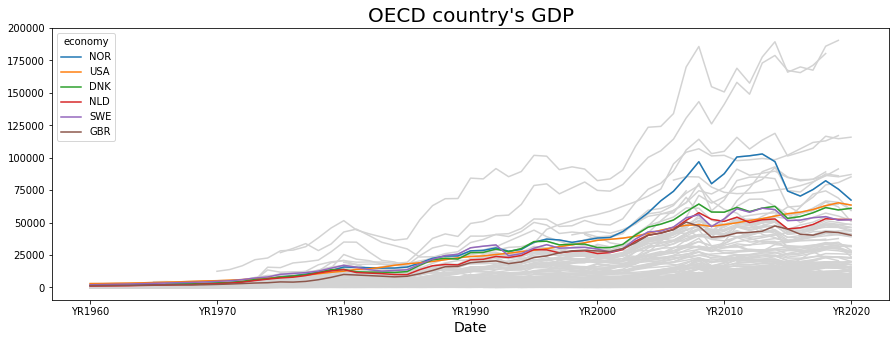

In [ ]:
gdp=wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('OED'))
us_gdp=gdp.loc[['SWE','GBR','NLD','USA','NOR','DNK']]
us_gdp=us_gdp.dropna(how='all',axis=True)

# Line graph by seaborn
a5=us_gdp.sort_values(by='YR2019', ascending=False)[:6]
ax=wld_gdp.transpose().plot(color='lightgray', legend=False)
a5.T.plot(ax=ax, figsize=(15,5))
plt.title('OECD country\'s GDP', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.show()



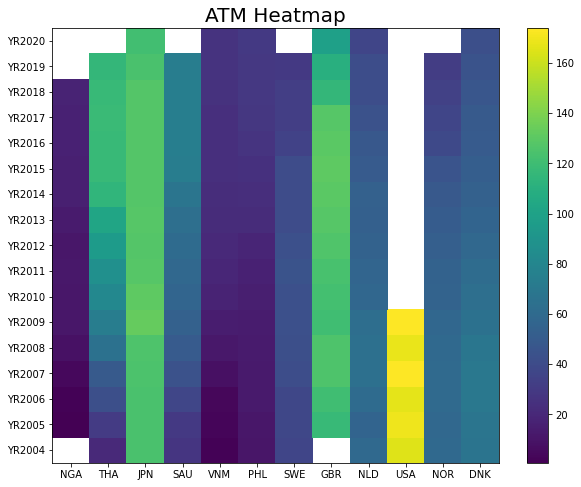

In [ ]:
# 현금없는 사회 상위 6개국과 하위 6개국 
atm=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atm=atm.dropna(how='all',axis=True)
atm=atm.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]

plt.rcParams['figure.figsize'] = [10, 8]

# heatmap by plt.pcolor()
plt.pcolor(atm.transpose())
plt.xticks(np.arange(0.5, len(atm.transpose().columns), 1), atm.transpose().columns)
plt.yticks(np.arange(0.5, len(atm.transpose().index), 1), atm.transpose().index)
plt.title('ATM Heatmap', fontsize=20)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Month', fontsize=14)
plt.colorbar()
plt.show()



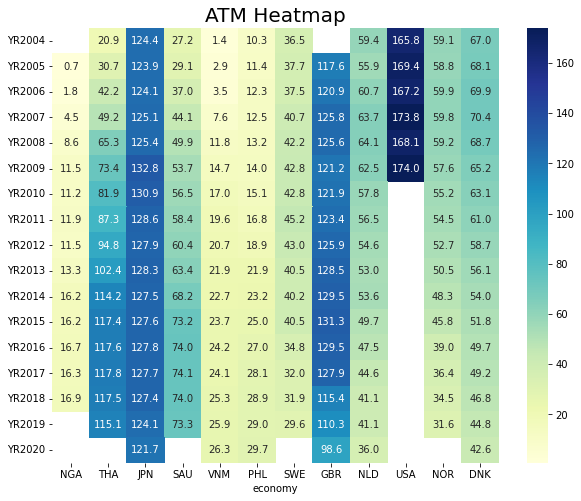

In [ ]:

# different colormap
sns.heatmap(atm.transpose(), cmap='YlGnBu',annot=True, fmt='.1f') # 
plt.title('ATM Heatmap', fontsize=20)
plt.show()



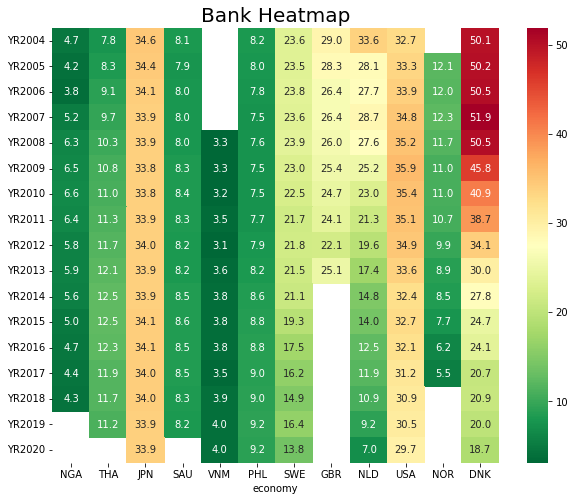

In [ ]:
bank=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
bank=bank.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
bank=bank.dropna(how='all',axis=True)

plt.rcParams['figure.figsize'] = [10, 8]

# heatmap by seaborn
ax = sns.heatmap(bank.transpose(),cmap='RdYlGn_r',annot=True, fmt='.1f')
plt.title('Bank Heatmap', fontsize=20)
plt.show() 

#좌측 6개의 열은 대체적으로 증가
#우측 6개의 열은 대부분 감소


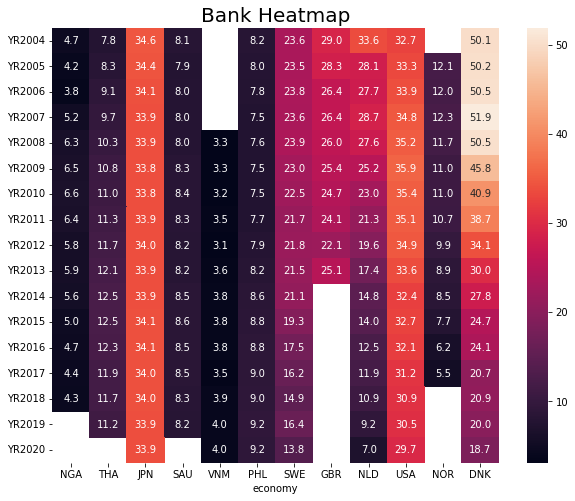

In [ ]:
# heatmap by seaborn
ax = sns.heatmap(bank.transpose(),annot=True, fmt='.1f')
plt.title('Bank Heatmap', fontsize=20)
plt.show() 

#좌측 6개의 열은 대체적으로 증가
#우측 6개의 열은 대부분 감소

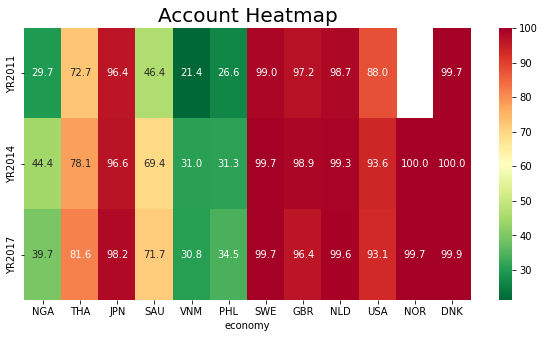

In [ ]:
ant=wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
ant=ant.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
ant=ant.dropna(how='all',axis=True)

plt.rcParams['figure.figsize'] = [10, 5]
# heatmap by seaborn
ax = sns.heatmap(ant.transpose(),cmap='RdYlGn_r',annot=True, fmt='.1f')
plt.title('Account Heatmap', fontsize=20)
plt.show() 

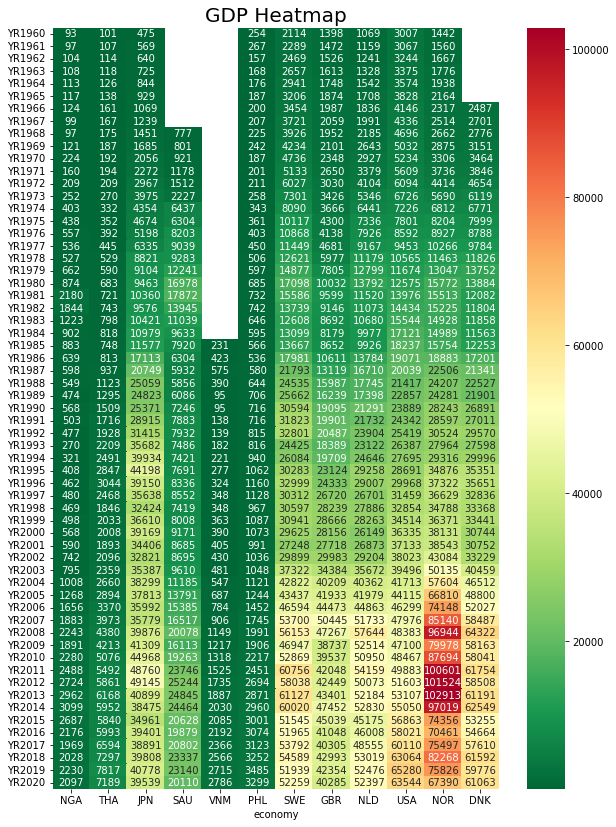

In [ ]:
gdp=wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('WLD'))
gdp=gdp.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
gdp=gdp.dropna(how='all',axis=True)

plt.rcParams['figure.figsize'] = [10, 14]
# heatmap by seaborn
ax = sns.heatmap(gdp.transpose(),cmap='RdYlGn_r',annot=True, fmt='.0f')
plt.title('GDP Heatmap', fontsize=20)
plt.show() 


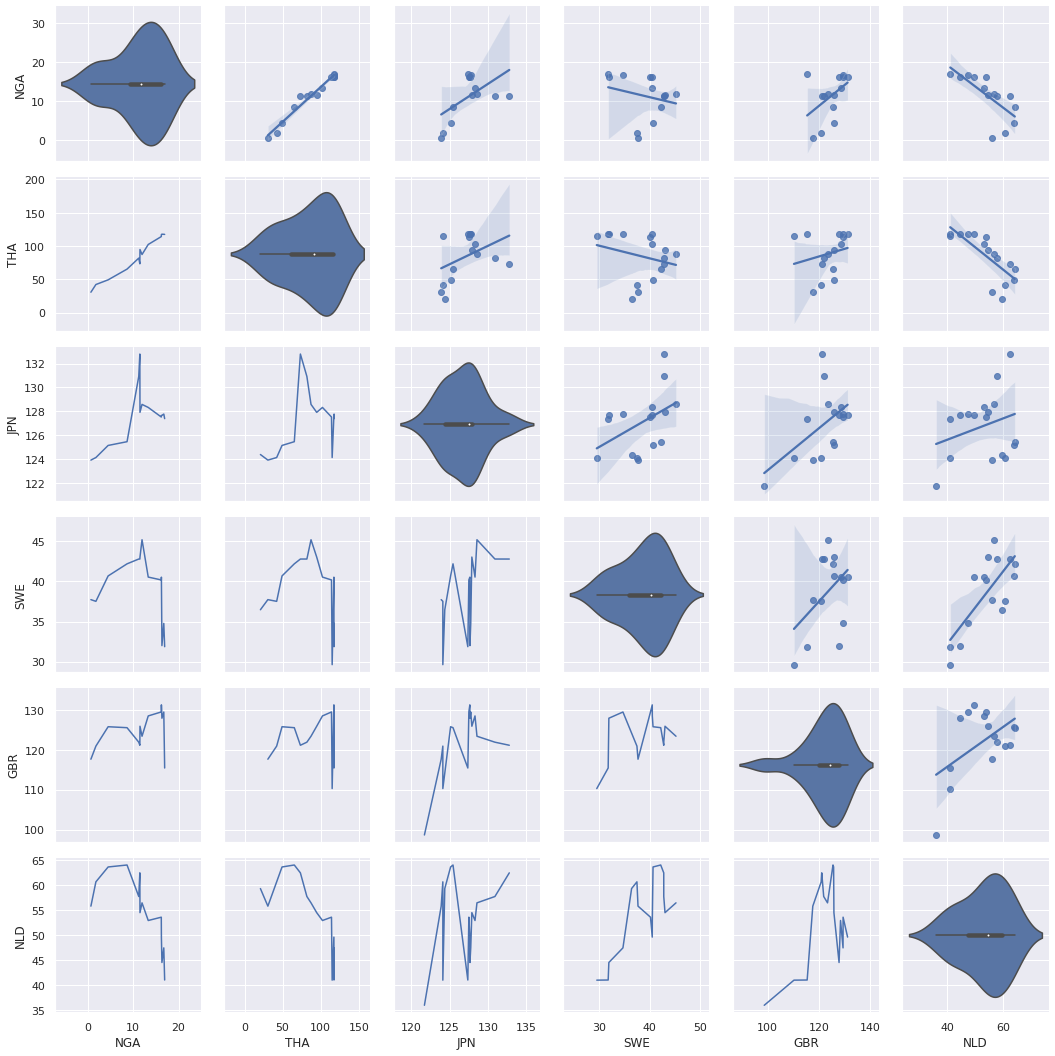

In [ ]:
# 현금없는 사회 상위 3개국과 하위 3개국 atm 산점도
atm=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atm=atm.dropna(how='all',axis=True)
atm=atm.loc[['NGA','THA','JPN','SWE','GBR','NLD']]

sns.set_theme()

grid = sns.PairGrid(atm.transpose())
grid.map_upper(sns.regplot)
grid.map_lower(sns.lineplot)
grid.map_diag(sns.violinplot)
plt.show()

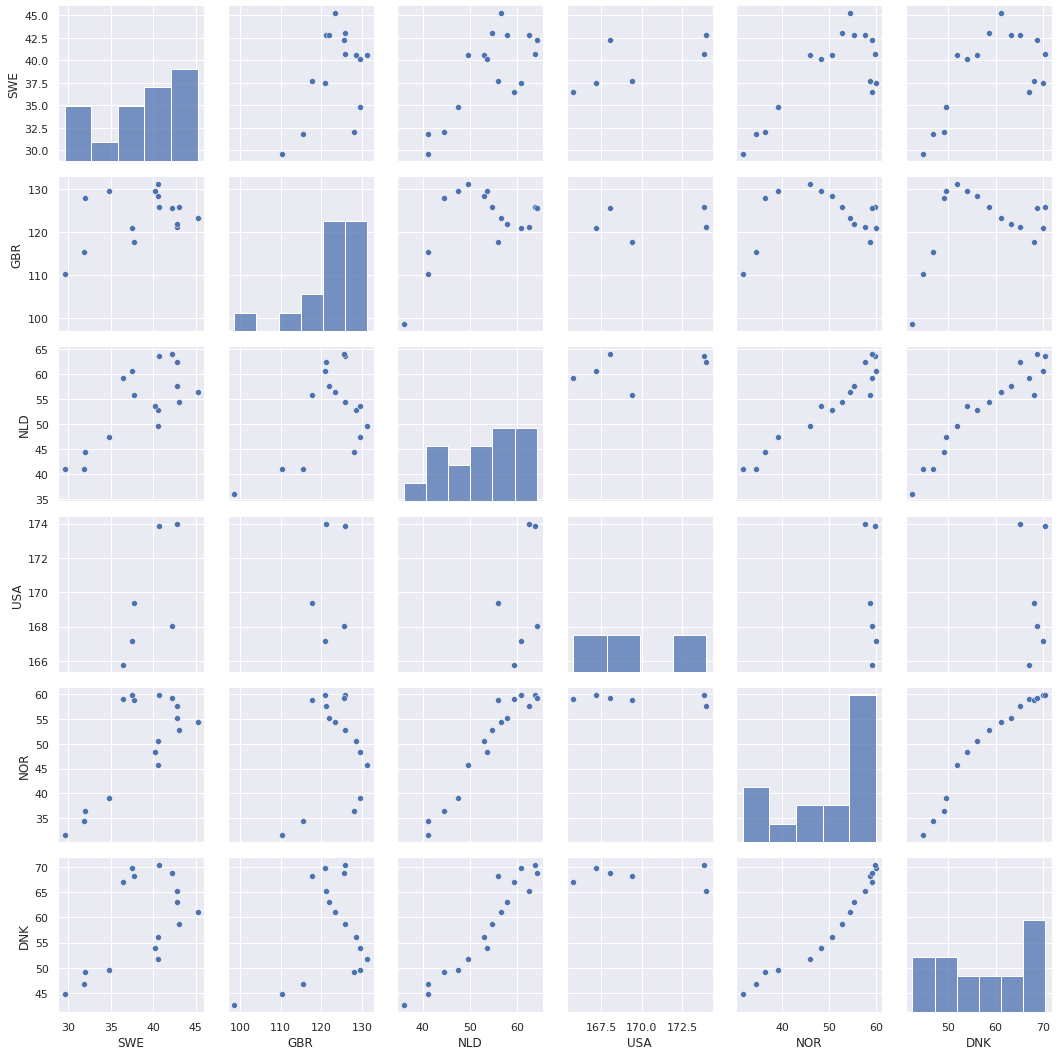

In [ ]:
# 상위 6개국 atm 산점도 
g = sns.PairGrid(us_atmperpop.transpose())
g.map_diag(sns.histplot)    # 대각선에 히스토그램 적용 
g.map_offdiag(sns.scatterplot)   # 대각선 이외의 서브플롯에는 scatterplot 

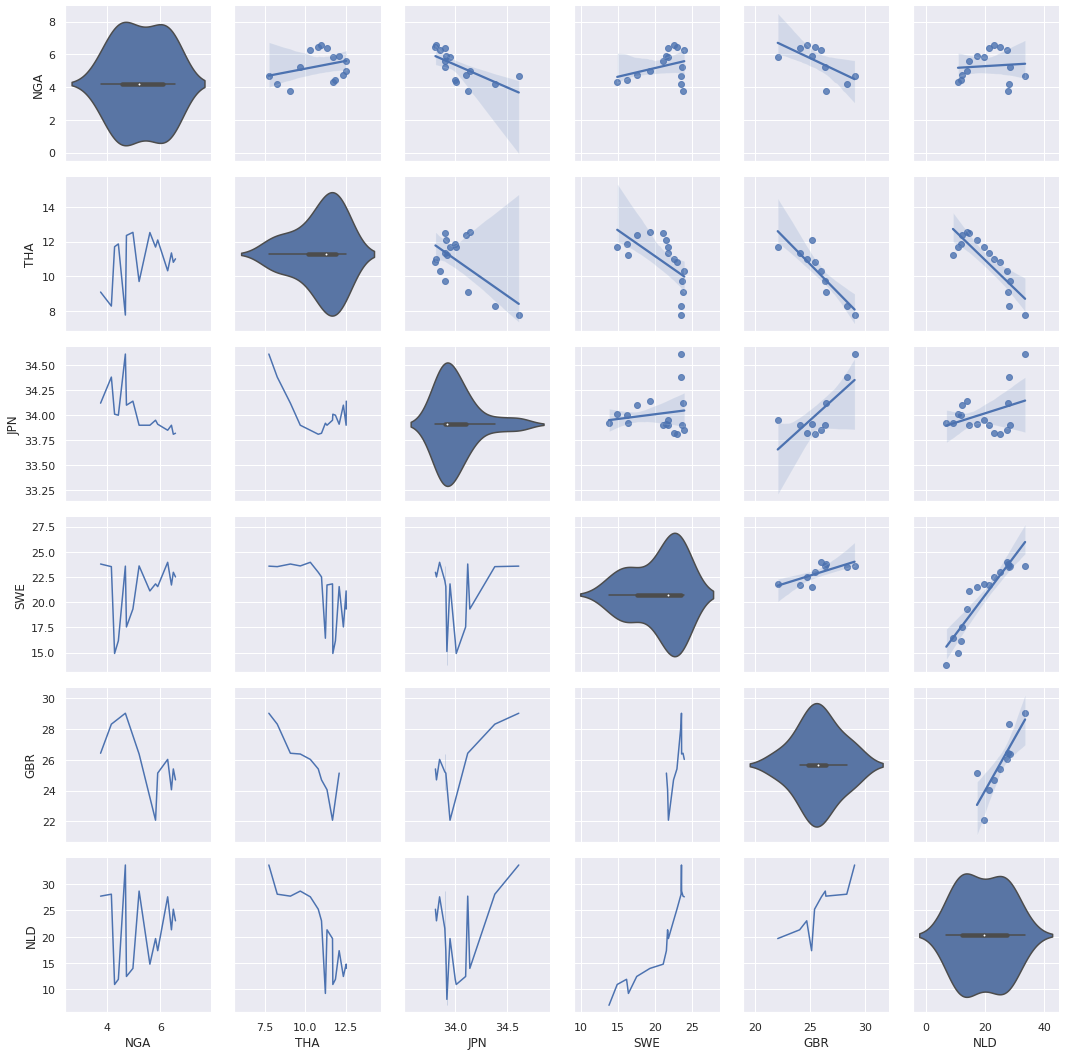

In [ ]:
# 상위 3개/ 하위 3개 bank 수 산점도
bank=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
bank=bank.loc[['NGA','THA','JPN','SWE','GBR','NLD']]
bank=bank.dropna(how='all',axis=True)

grid = sns.PairGrid(bank.transpose())
grid.map_upper(sns.regplot)
grid.map_lower(sns.lineplot)
grid.map_diag(sns.violinplot)
plt.show()

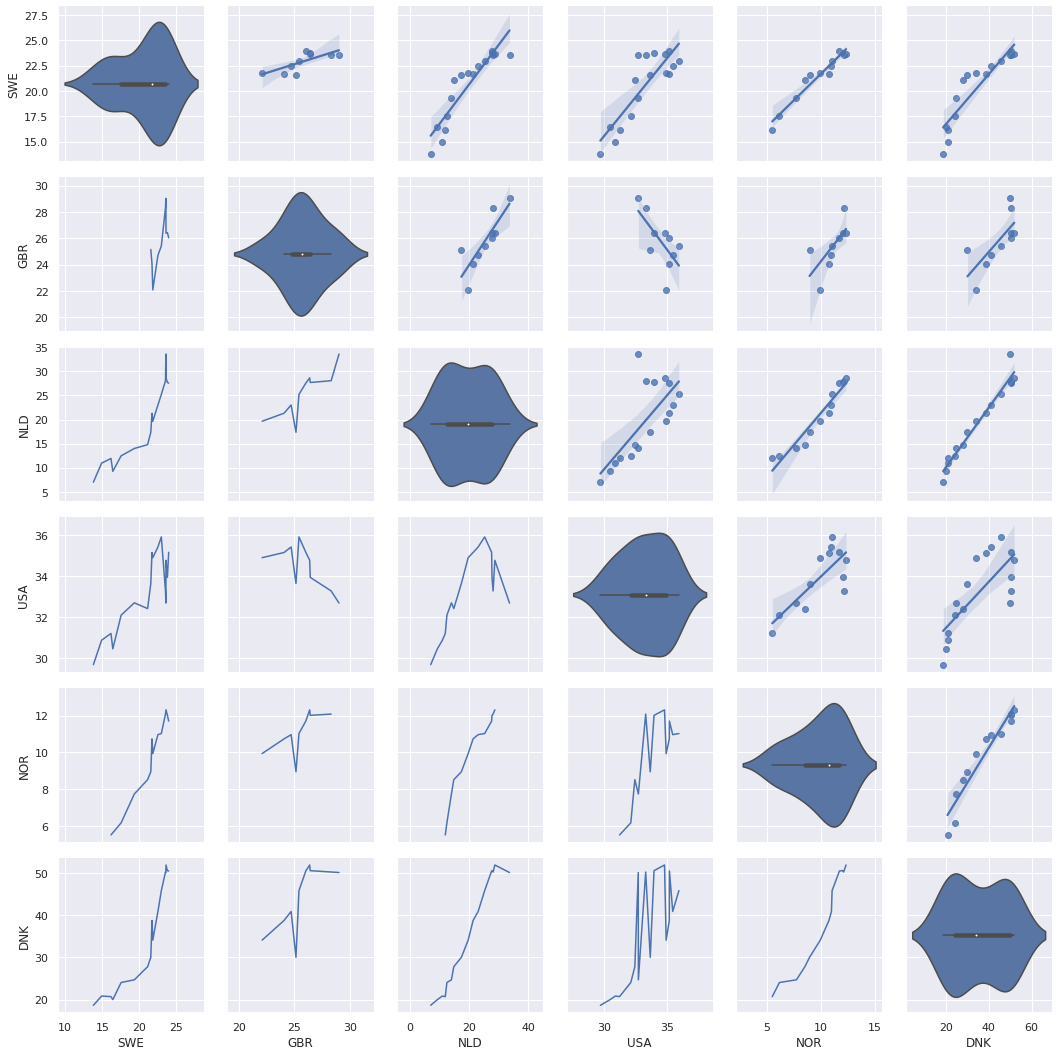

In [ ]:
# 상위 6개국 bank 수 산점도
grid = sns.PairGrid(us_bankperpop.transpose())
grid.map_upper(sns.regplot)
grid.map_lower(sns.lineplot)
grid.map_diag(sns.violinplot)
plt.show()

In [ ]:
gdp=wb.data.DataFrame('NY.GDP.PCAP.CD',  wb.region.members('WLD'))
gdp=gdp.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
gdp=gdp.dropna(how='all',axis=True)
gdp_trans=gdp.transpose().reset_index()
gdp_trans['indicator']='gdp'

atm=wb.data.DataFrame('FB.ATM.TOTL.P5',  wb.region.members('WLD'))
atm=atm.dropna(how='all',axis=True)
atm=atm.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
atm_trans=atm.transpose().reset_index()
atm_trans['indicator']='atm'

ant=wb.data.DataFrame('FX.OWN.TOTL.ZS',  wb.region.members('WLD'))
ant=ant.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
ant=ant.dropna(how='all',axis=True)
ant_trans=ant.transpose().reset_index()
ant_trans['indicator']='account'

bank=wb.data.DataFrame('FB.CBK.BRCH.P5',  wb.region.members('WLD'))
bank=bank.loc[['NGA','THA','JPN','SAU','VNM','PHL','SWE','GBR','NLD','USA','NOR','DNK']]
bank=bank.dropna(how='all',axis=True)
bank_trans=bank.transpose().reset_index()
bank_trans['indicator']='bank'


result = pd.concat([gdp_trans,atm_trans,ant_trans,bank_trans])
result

economy,index,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK,indicator
0,YR1960,92.960466,100.767475,475.319076,NaN,NaN,254.458877,2114.002973,1397.594803,1068.784587,3007.123445,1441.755660,NaN,gdp
1,YR1961,96.979030,107.498001,568.907743,NaN,NaN,267.182838,2288.921701,1472.385714,1159.392357,3066.562869,1560.324931,NaN,gdp
2,YR1962,104.387029,113.782850,639.640785,NaN,NaN,156.703840,2468.694589,1525.775853,1240.677894,3243.843078,1667.247430,NaN,gdp
3,YR1963,107.540573,118.143907,724.693762,NaN,NaN,168.040949,2657.022505,1613.456884,1328.036649,3374.515171,1775.582655,NaN,gdp
4,YR1964,113.168717,125.938694,843.616879,NaN,NaN,175.955798,2941.048899,1748.288118,1541.947365,3573.941185,1937.884614,NaN,gdp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,YR2016,4.740000,12.350000,34.100000,8.53,3.83,8.840000,17.540000,NaN,12.460000,32.100000,6.160000,24.05,bank
13,YR2017,4.440000,11.860000,34.000000,8.50,3.45,8.990000,16.170000,NaN,11.920000,31.210000,5.500000,20.71,bank
14,YR2018,4.300000,11.700000,34.010000,8.34,3.92,9.020000,14.910000,NaN,10.940000,30.880000,NaN,20.85,bank
15,YR2019,NaN,11.240000,33.920000,8.16,3.98,9.200000,16.420000,NaN,9.240000,30.460000,NaN,20.00,bank


In [ ]:
result.sort_values(by=['index'],axis=0)
result

economy,index,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK,indicator
0,YR1960,92.960466,100.767475,475.319076,NaN,NaN,254.458877,2114.002973,1397.594803,1068.784587,3007.123445,1441.755660,NaN,gdp
1,YR1961,96.979030,107.498001,568.907743,NaN,NaN,267.182838,2288.921701,1472.385714,1159.392357,3066.562869,1560.324931,NaN,gdp
2,YR1962,104.387029,113.782850,639.640785,NaN,NaN,156.703840,2468.694589,1525.775853,1240.677894,3243.843078,1667.247430,NaN,gdp
3,YR1963,107.540573,118.143907,724.693762,NaN,NaN,168.040949,2657.022505,1613.456884,1328.036649,3374.515171,1775.582655,NaN,gdp
4,YR1964,113.168717,125.938694,843.616879,NaN,NaN,175.955798,2941.048899,1748.288118,1541.947365,3573.941185,1937.884614,NaN,gdp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,YR2016,4.740000,12.350000,34.100000,8.53,3.83,8.840000,17.540000,NaN,12.460000,32.100000,6.160000,24.05,bank
13,YR2017,4.440000,11.860000,34.000000,8.50,3.45,8.990000,16.170000,NaN,11.920000,31.210000,5.500000,20.71,bank
14,YR2018,4.300000,11.700000,34.010000,8.34,3.92,9.020000,14.910000,NaN,10.940000,30.880000,NaN,20.85,bank
15,YR2019,NaN,11.240000,33.920000,8.16,3.98,9.200000,16.420000,NaN,9.240000,30.460000,NaN,20.00,bank


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


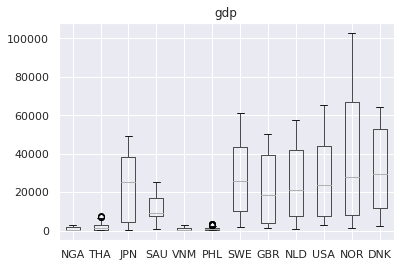

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


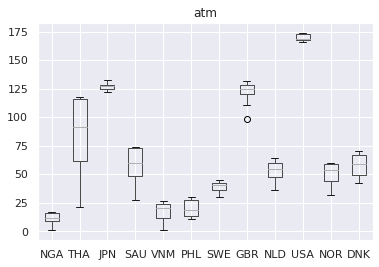

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


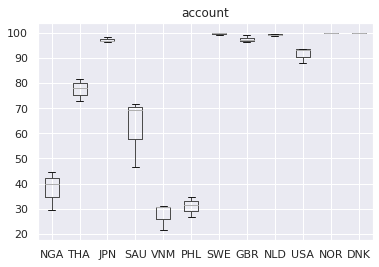

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


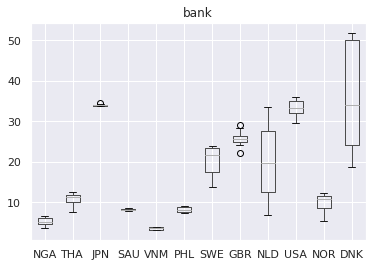

In [ ]:
indicator=result.indicator.unique().tolist()

for i in indicator:
  plt.title(i)
  result[result['indicator']==i].boxplot(figsize=(10,5))
  plt.show()

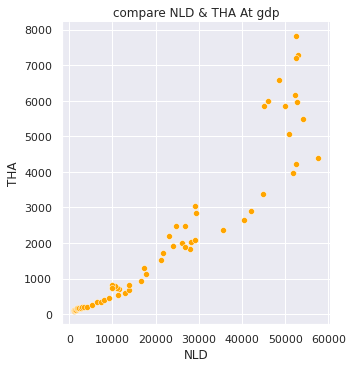

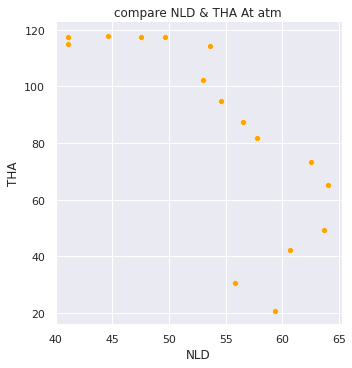

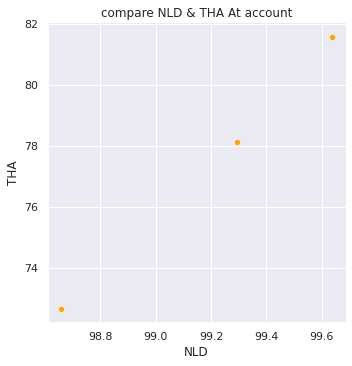

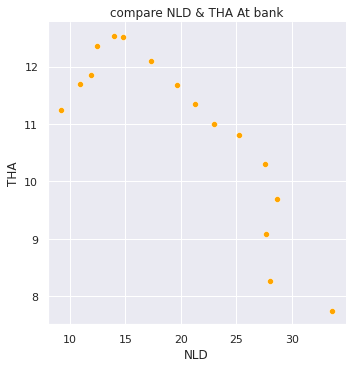

In [ ]:
for i in indicator:
  sns.relplot(data=result[result['indicator']==i], x='NLD',y='THA',color='orange')
  plt.xlabel("NLD")
  plt.title("compare NLD & THA At "+i)
  plt.show()

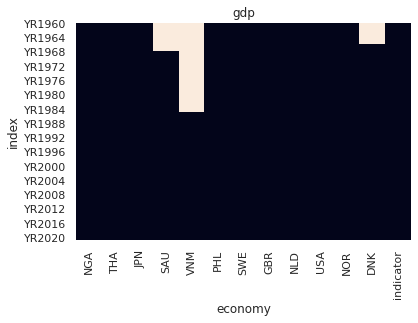

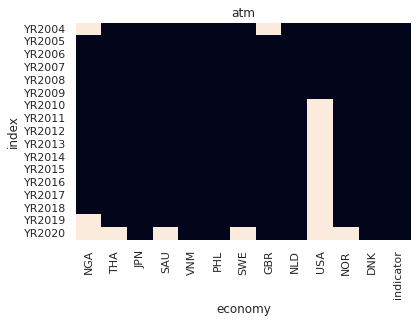

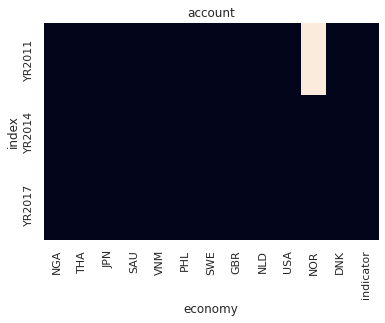

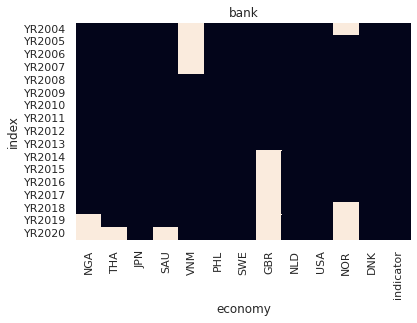

In [ ]:
#결측값 시각화
%matplotlib inline 
indicator=result.indicator.unique().tolist()
#seaborn 

for i in indicator:
  plt.title(i)
  sns.heatmap(result[result['indicator']==i].set_index('index').isnull(),cbar=False)
  # result[result['indicator']==i].boxplot(figsize=(10,5))
  plt.show()

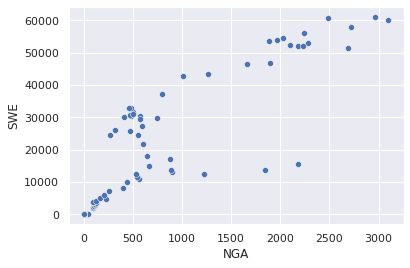

In [ ]:
ax=sns.scatterplot(x="NGA",y="SWE",data=result)

In [ ]:
result

economy,index,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK,indicator
0,YR1960,92.960466,100.767475,475.319076,NaN,NaN,254.458877,2114.002973,1397.594803,1068.784587,3007.123445,1441.755660,NaN,gdp
1,YR1961,96.979030,107.498001,568.907743,NaN,NaN,267.182838,2288.921701,1472.385714,1159.392357,3066.562869,1560.324931,NaN,gdp
2,YR1962,104.387029,113.782850,639.640785,NaN,NaN,156.703840,2468.694589,1525.775853,1240.677894,3243.843078,1667.247430,NaN,gdp
3,YR1963,107.540573,118.143907,724.693762,NaN,NaN,168.040949,2657.022505,1613.456884,1328.036649,3374.515171,1775.582655,NaN,gdp
4,YR1964,113.168717,125.938694,843.616879,NaN,NaN,175.955798,2941.048899,1748.288118,1541.947365,3573.941185,1937.884614,NaN,gdp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,YR2016,4.740000,12.350000,34.100000,8.53,3.83,8.840000,17.540000,NaN,12.460000,32.100000,6.160000,24.05,bank
13,YR2017,4.440000,11.860000,34.000000,8.50,3.45,8.990000,16.170000,NaN,11.920000,31.210000,5.500000,20.71,bank
14,YR2018,4.300000,11.700000,34.010000,8.34,3.92,9.020000,14.910000,NaN,10.940000,30.880000,NaN,20.85,bank
15,YR2019,NaN,11.240000,33.920000,8.16,3.98,9.200000,16.420000,NaN,9.240000,30.460000,NaN,20.00,bank


In [ ]:
atm.transpose().style.bar(color= 'orange')

economy,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK
YR2004,nan,20.855230,124.369047,27.168022,1.409589,10.311727,36.469533,nan,59.375531,165.783891,59.138065,67.023411
YR2005,0.680126,30.653426,123.900401,29.132537,2.912677,11.432779,37.731229,117.648614,55.858923,169.368739,58.763971,68.135125
YR2006,1.780070,42.196576,124.115344,37.028182,3.457922,12.314518,37.518718,120.937957,60.720675,167.185441,59.929475,69.890174
YR2007,4.476741,49.237019,125.130860,44.097129,7.572170,12.502514,40.687856,125.802108,63.694135,173.842306,59.782205,70.392330
YR2008,8.641506,65.349096,125.445950,49.931293,11.825384,13.172395,42.196673,125.562283,64.088754,168.051306,59.221175,68.729978
YR2009,11.463693,73.356627,132.807696,53.688766,14.725051,14.008426,42.795309,121.152025,62.517323,173.959780,57.596338,65.177409
YR2010,11.225850,81.886410,130.927766,56.468188,17.017598,15.106525,42.796979,121.921206,57.786031,nan,55.246155,63.138622
YR2011,11.943614,87.312984,128.579217,58.386218,19.589448,16.804617,45.203246,123.415450,56.516725,nan,54.469652,61.047168
YR2012,11.493028,94.786477,127.911026,60.423021,20.671119,18.851103,43.042657,125.923409,54.556203,nan,52.730509,58.708364
YR2013,13.311899,102.354033,128.323407,63.352311,21.857615,21.925518,40.545933,128.513275,52.985556,nan,50.496874,56.132128


In [ ]:
bank.transpose().style.bar(color='lightblue')

economy,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK
YR2004,4.700000,7.750000,34.610000,8.130000,nan,8.210000,23.570000,29.030000,33.610000,32.690000,nan,50.080000
YR2005,4.180000,8.270000,34.380000,7.860000,nan,8.000000,23.520000,28.320000,28.070000,33.280000,12.080000,50.200000
YR2006,3.780000,9.080000,34.120000,7.950000,nan,7.800000,23.780000,26.430000,27.700000,33.940000,12.010000,50.520000
YR2007,5.210000,9.690000,33.900000,8.010000,nan,7.530000,23.590000,26.380000,28.660000,34.770000,12.310000,51.860000
YR2008,6.270000,10.310000,33.850000,8.020000,3.260000,7.570000,23.950000,26.030000,27.570000,35.160000,11.700000,50.450000
YR2009,6.480000,10.800000,33.810000,8.300000,3.280000,7.490000,22.960000,25.410000,25.220000,35.910000,11.020000,45.800000
YR2010,6.560000,11.000000,33.820000,8.360000,3.210000,7.550000,22.500000,24.700000,23.020000,35.420000,10.960000,40.860000
YR2011,6.410000,11.340000,33.900000,8.280000,3.540000,7.660000,21.700000,24.060000,21.310000,35.150000,10.730000,38.730000
YR2012,5.820000,11.680000,33.950000,8.170000,3.100000,7.930000,21.810000,22.080000,19.650000,34.900000,9.930000,34.080000
YR2013,5.900000,12.090000,33.910000,8.170000,3.640000,8.240000,21.540000,25.140000,17.350000,33.640000,8.940000,30.010000


In [ ]:
atm.transpose().style.background_gradient(cmap='Oranges')

economy,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK
YR2004,nan,20.855230,124.369047,27.168022,1.409589,10.311727,36.469533,nan,59.375531,165.783891,59.138065,67.023411
YR2005,0.680126,30.653426,123.900401,29.132537,2.912677,11.432779,37.731229,117.648614,55.858923,169.368739,58.763971,68.135125
YR2006,1.780070,42.196576,124.115344,37.028182,3.457922,12.314518,37.518718,120.937957,60.720675,167.185441,59.929475,69.890174
YR2007,4.476741,49.237019,125.130860,44.097129,7.572170,12.502514,40.687856,125.802108,63.694135,173.842306,59.782205,70.392330
YR2008,8.641506,65.349096,125.445950,49.931293,11.825384,13.172395,42.196673,125.562283,64.088754,168.051306,59.221175,68.729978
YR2009,11.463693,73.356627,132.807696,53.688766,14.725051,14.008426,42.795309,121.152025,62.517323,173.959780,57.596338,65.177409
YR2010,11.225850,81.886410,130.927766,56.468188,17.017598,15.106525,42.796979,121.921206,57.786031,nan,55.246155,63.138622
YR2011,11.943614,87.312984,128.579217,58.386218,19.589448,16.804617,45.203246,123.415450,56.516725,nan,54.469652,61.047168
YR2012,11.493028,94.786477,127.911026,60.423021,20.671119,18.851103,43.042657,125.923409,54.556203,nan,52.730509,58.708364
YR2013,13.311899,102.354033,128.323407,63.352311,21.857615,21.925518,40.545933,128.513275,52.985556,nan,50.496874,56.132128


In [ ]:
bank.transpose().style.background_gradient(cmap= 'PuBu')

economy,NGA,THA,JPN,SAU,VNM,PHL,SWE,GBR,NLD,USA,NOR,DNK
YR2004,4.700000,7.750000,34.610000,8.130000,nan,8.210000,23.570000,29.030000,33.610000,32.690000,nan,50.080000
YR2005,4.180000,8.270000,34.380000,7.860000,nan,8.000000,23.520000,28.320000,28.070000,33.280000,12.080000,50.200000
YR2006,3.780000,9.080000,34.120000,7.950000,nan,7.800000,23.780000,26.430000,27.700000,33.940000,12.010000,50.520000
YR2007,5.210000,9.690000,33.900000,8.010000,nan,7.530000,23.590000,26.380000,28.660000,34.770000,12.310000,51.860000
YR2008,6.270000,10.310000,33.850000,8.020000,3.260000,7.570000,23.950000,26.030000,27.570000,35.160000,11.700000,50.450000
YR2009,6.480000,10.800000,33.810000,8.300000,3.280000,7.490000,22.960000,25.410000,25.220000,35.910000,11.020000,45.800000
YR2010,6.560000,11.000000,33.820000,8.360000,3.210000,7.550000,22.500000,24.700000,23.020000,35.420000,10.960000,40.860000
YR2011,6.410000,11.340000,33.900000,8.280000,3.540000,7.660000,21.700000,24.060000,21.310000,35.150000,10.730000,38.730000
YR2012,5.820000,11.680000,33.950000,8.170000,3.100000,7.930000,21.810000,22.080000,19.650000,34.900000,9.930000,34.080000
YR2013,5.900000,12.090000,33.910000,8.170000,3.640000,8.240000,21.540000,25.140000,17.350000,33.640000,8.940000,30.010000
